# Analysis on Colin Kaepernick and the Nike Backlash

As part of the [Kaggle: 5,000 #JustDoIt! Tweets Dataset](https://www.kaggle.com/eliasdabbas/5000-justdoit-tweets-dataset), we will see to perform analysis on the tweets responding to Nike's campaign endoresement for Colin Kaepernick. For those un aware, at the beginning of the NFL 2018-2019 season, Nike made an endorement deal with Colin Kaepernick that sparked a wide spread backlash and support. Last season, Colin Kaepernick and other NFL players began showing protest during the NFL national anthem due to an all to common occurance of police brutality, racial inequality among other issues. 

We will be performing analysis on the various topic trends from Twitter to determine and depection of the various fans recations both in support and urging a boycott of some of Nike's apparals. 


![](https://d3i6fh83elv35t.cloudfront.net/static/2018/09/colin-kaepernick-nike-1024x575.jpeg)

In [88]:
import pandas as pd
import html

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

In [89]:
data = pd.read_csv('justdoit_tweets_2018_09_07_2.csv')
data.head(3)

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,Done is better than perfect. — Sheryl Sandberg...,NaN,...,333333,True,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,Shout out to the Great Fire Department and the...,NaN,...,333333,True,False,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,There are some AMAZINGLY hilarious Nike Ad mem...,NaN,...,050505,True,False,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True


column names

In [90]:
data.columns

Index(['tweet_contributors', 'tweet_coordinates', 'tweet_created_at',
       'tweet_display_text_range', 'tweet_entities', 'tweet_extended_entities',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_full_text',
       'tweet_geo', 'tweet_id', 'tweet_id_str',
       'tweet_in_reply_to_screen_name', 'tweet_in_reply_to_status_id',
       'tweet_in_reply_to_status_id_str', 'tweet_in_reply_to_user_id',
       'tweet_in_reply_to_user_id_str', 'tweet_is_quote_status', 'tweet_lang',
       'tweet_metadata', 'tweet_place', 'tweet_possibly_sensitive',
       'tweet_quoted_status', 'tweet_quoted_status_id',
       'tweet_quoted_status_id_str', 'tweet_retweet_count', 'tweet_retweeted',
       'tweet_source', 'tweet_truncated', 'tweet_user',
       'user_contributors_enabled', 'user_created_at', 'user_default_profile',
       'user_default_profile_image', 'user_description', 'user_entities',
       'user_favourites_count', 'user_follow_request_sent',
       'user_followers_count', 'user_fol

## Data Processing & Exporatory

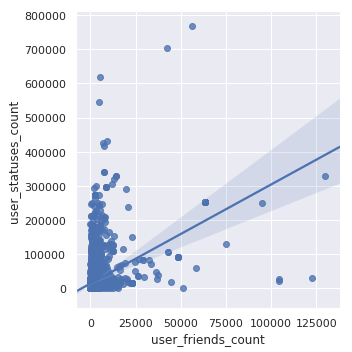

In [91]:
sns.lmplot(x='user_friends_count', y='user_statuses_count', data = data)

### Text Cleaning
For the text cleaning we will look to remove some unuseful textual data that does not assist our analysis, including:
1. 

In [92]:
import re

def preprocess_post(post):
    post = str(post)
    #post = html.unescape(post)
    post = re.sub(r"http.?://[^\s]+[\s]?", '',post)
    post = ''.join(c for c in post if not c.isdigit())
    post = post.lower()
    post = re.sub('\n', ' ', post)
    post = re.sub(r'[^\w\s]','',post)
    
    
    return post

In [93]:
tweets = pd.DataFrame(data.tweet_full_text[:40].map(lambda x: preprocess_post(x)))
tweets.tweet_full_text[5]

'realdonaldtrump its time for me to stock up on some new running apparel nike it is justdoit'

### Distribution of Tweet length

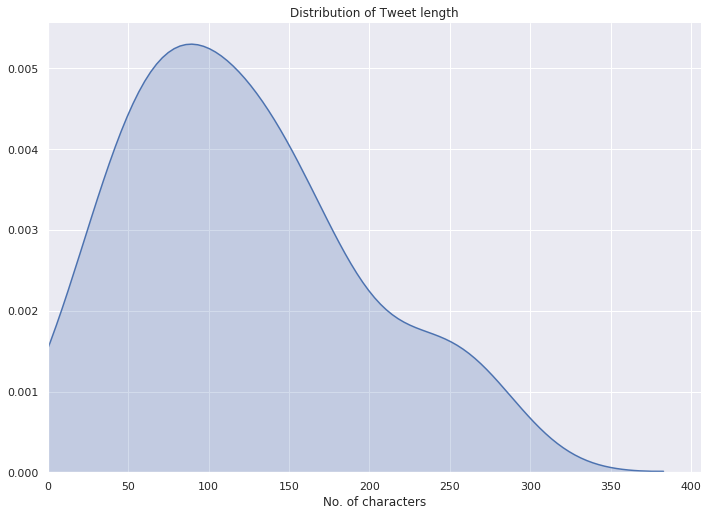

In [94]:
tweet_len = []

#for k in data['tweet_full_text']:
for k in tweets.tweet_full_text:
    if isinstance(k,str):
        tweet_len.append(len(k))

sns.set()
fig_dims = (11.7,8.27)
fig,ax = plt.subplots(figsize=fig_dims)
sns.kdeplot(tweet_len,shade=True)
plt.title("Distribution of Tweet length")
plt.xlabel("No. of characters")
plt.ylim(0,None)
plt.xlim(0,None)
sns.despine()

In the plot above, the tweet distribution of the characters is around 150 characters. This was after Twitters extentions on the previous limitation of 150 characters. the ones that reach past 200 is intresting... there are some twitte characters in almost reaching a thousand. 

In [95]:
data.tweet_extended_entities[0]

"{'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'url': 'https://t.co/J9lLdszdW6', 'display_url': 'pic.twitter.com/J9lLdszdW6', 'expanded_url': 'https://twitter.com/UltraYOUwoman/status/1038100857932394496/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 612, 'h': 612, 'resize': 'fit'}, 'large': {'w': 612, 'h': 612, 'resize': 'fit'}, 'medium': {'w': 612, 'h': 612, 'resize': 'fit'}}}]}"

In [96]:
data.tweet_full_text[1]

'Shout out to the Great Fire Department and the tour! 👨\u200d🚒👨\u200d🚒 Much love to NYC! 💯🎥🔥✊🏿\n•\n•\n•\n#hero #fdny #likesforlikes #promo #music #instagood #instadaily #postoftheday #bestoftheday #justdoit #nike #picoftheday... https://t.co/sFobQ2ukpo'

In [97]:
test_text = data.tweet_full_text[:20]

### Sentiment Analysis
One of the ways to perform to understand the _'tone'_ of the text of the tweet is to analyse the specific word usage and the sentiment associated with those words. With sentiment analysis we are able to measure the tone and gauge the positivity or negativity of the tweet. For right now we will just return the sentiment results as: 0 for neural, 1 positive, -1 and negative.

In [98]:
from textblob import TextBlob

def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

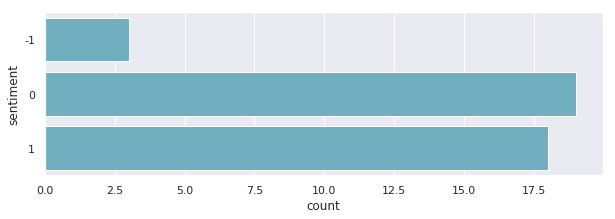

In [99]:
tweets['sentiment'] = [get_sentiment(text) for text in tweets.tweet_full_text]

# plot the sentiments
f, ax = plt.subplots(figsize = (10, 3))
sns.countplot(y='sentiment', data=tweets, color='c')

Viewing the bar graph above we can initially see that the graph is a leftward skewed graph indicating that the majority of the senitments are either neural or positive but a substaintal amount. 

### Text Analysis

In [100]:
# twitter mining inspiration: https://github.com/mobu/TwitterMiner/blob/master/Analyze.ipynb
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter

tokens = []
for key,value in tweets.tweet_full_text.iteritems():
    tokens.append(word_tokenize(value))

lower_case = []
for k in tokens:
    for j in k:
        lower_case.append(j.lower())
        
table = str.maketrans('','',string.punctuation)
stripped = [w.translate(table) for w in lower_case]
words = [word for word in stripped if word.isalpha()]

stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
word_counts = Counter(words)

# print first 20
print(words[:20])

['done', 'better', 'perfect', 'sheryl', 'sandberg', 'quote', 'motivation', 'justdoit', 'shout', 'great', 'fire', 'department', 'tour', 'much', 'love', 'nyc', 'hero', 'fdny', 'likesforlikes', 'promo']


So now that we have a bag of words for all of the tweets, lets try to make a visualization to see if there are any trends or meaningful information that can help us understand the underlying values or potential common areas of concern people are communicating. Therefore, it seems that we should look at the most common words. Intitially the top most common words are probably #justdoit #nike and something about colin kaepernick since these are obviously the main subject of this analysis.

In [101]:
txt_count = pd.DataFrame(word_counts.most_common(20), columns=['word','freq'])
txt_count

,word,freq
0,justdoit,40
1,nike,26
2,realdonaldtrump,6
3,like,5
4,great,3
5,one,3
6,dream,3
7,millions,3
8,dollars,3
9,free,3


Interesting enough, our inital assumation about the subject areas were correct, however it is quite surprise and (but lets be honest...not really) the `realdonaldtrump` is the fourth common word in this tweet storm... and them `dont`.

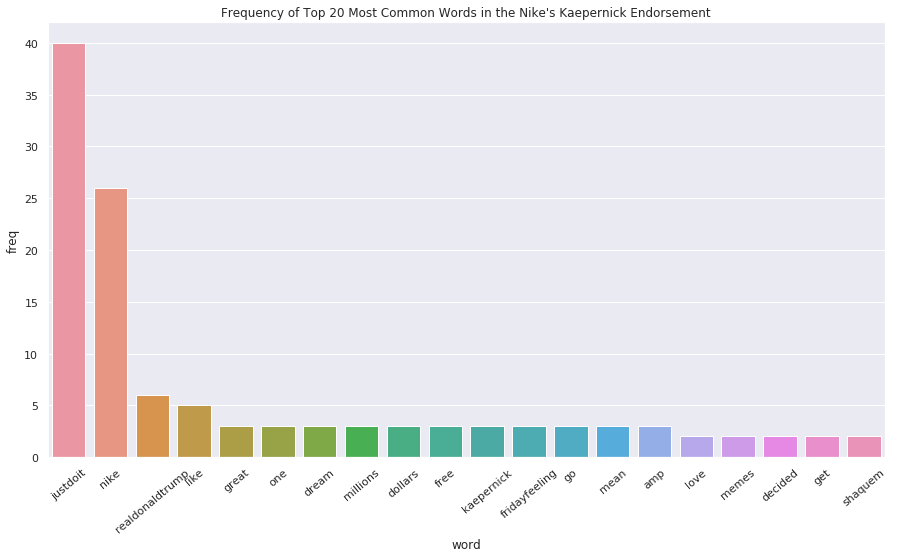

In [102]:
fig = plt.figure(figsize=(15,8))
ax = sns.barplot(x='word', y='freq', data=txt_count)
ax.set_xticklabels(labels=txt_count.word,rotation=40)
plt.title("Frequency of Top 20 Most Common Words in the Nike's Kaepernick Endorsement")
plt.show()

### Tweet Time Frequency

In [103]:
data['tweet_time'] = pd.to_datetime(data.tweet_created_at)

In [104]:
data = data.set_index('tweet_time')

In [105]:
df = data[['tweet_id']]
tweet_volume = df.resample('30min').count()

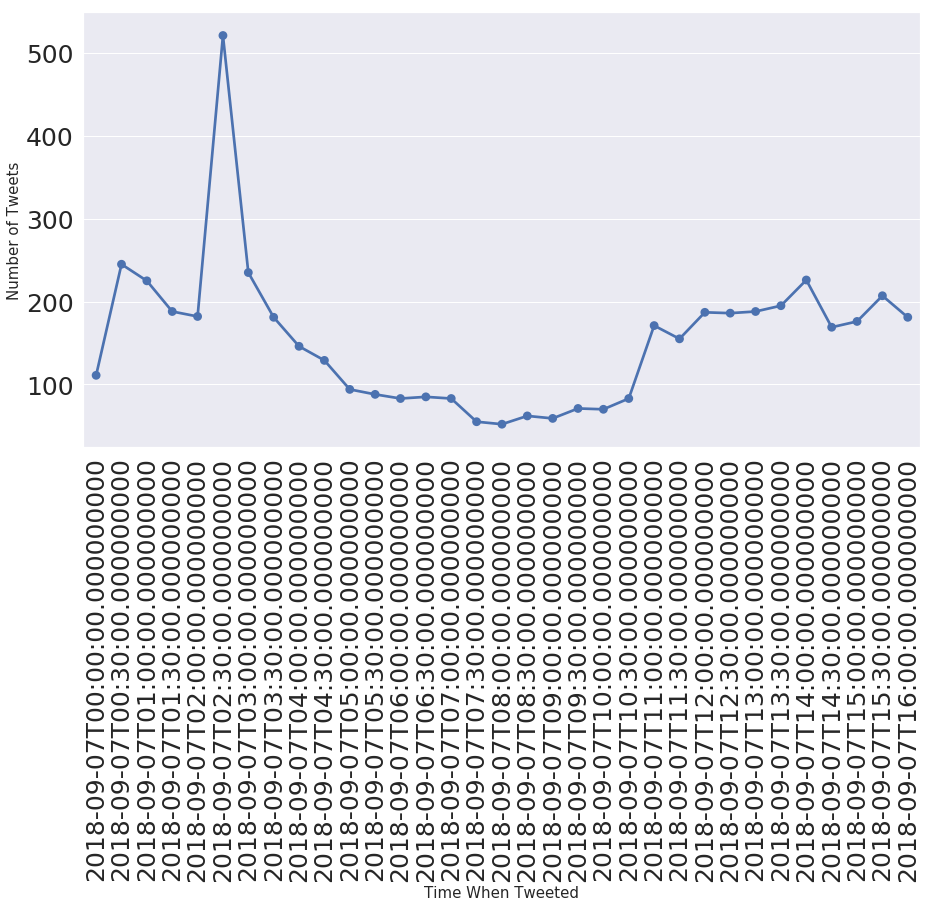

In [106]:

fig = plt.figure(figsize=(15,8))
ax = sns.pointplot(x=tweet_volume.index, y='tweet_id', data=tweet_volume)
ax.set_xlabel("Time When Tweeted", fontsize=15)
ax.set_ylabel("Number of Tweets", fontsize=15)
ax.tick_params(labelsize=25)

for item in ax.get_xticklabels():
    item.set_rotation(90)

## Additional Feature Engineering

As one who spent a brief time in college on twitter, while we did take out special character usages for understanding the sentiments, the _twitter culture_ is all about using special character to further indicate a message such as ALL CAPS and hashtags. So lets time some time to develope acouple additional features to explore these aspects wuch as:

    A. Exclamation marks to indicate further strength in tone in the initial sentiment score
    B. Number of hashtags used (actually there is a 

In [107]:
data.head()

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
tweet_time,,,,,,,,,,,,,,,,,,,,,
2018-09-07 16:25:06,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,Done is better than perfect. — Sheryl Sandberg...,NaN,...,333333,True,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False
2018-09-07 16:24:59,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,Shout out to the Great Fire Department and the...,NaN,...,333333,True,False,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False
2018-09-07 16:24:50,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,There are some AMAZINGLY hilarious Nike Ad mem...,NaN,...,050505,True,False,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True
2018-09-07 16:24:44,NaN,"{'type': 'Point', 'coordinates': [-86.45594032...",Fri Sep 07 16:24:44 +0000 2018,"[0, 88]","{'hashtags': [{'text': 'kapernickeffect', 'ind...",NaN,0,False,#kapernickeffect #swoosh #justdoit @ Lucas Bis...,"{'type': 'Point', 'coordinates': [35.85402047,...",...,333333,True,False,ErvGotti609,1983.0,NaN,none,NaN,NaN,False
2018-09-07 16:24:39,NaN,NaN,Fri Sep 07 16:24:39 +0000 2018,"[0, 132]","{'hashtags': [{'text': 'shaquem', 'indices': [...","{'media': [{'id': 1038100736595255296, 'id_str...",0,False,"One Hand, One Dream: The Shaquem Griffin Story...",NaN,...,1A1E1A,True,False,NoLuckNeeded,24989.0,NaN,none,http://t.co/MMGF9RfLz0,NaN,False


Importing `yaml` to dal with non-standard json strings such as the `tweet_entities` so we can perform analysis on the corresponding twitter hashtags

In [110]:
import yaml

In [40]:
data.tweet_extended_entities[0]

"{'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'url': 'https://t.co/J9lLdszdW6', 'display_url': 'pic.twitter.com/J9lLdszdW6', 'expanded_url': 'https://twitter.com/UltraYOUwoman/status/1038100857932394496/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 612, 'h': 612, 'resize': 'fit'}, 'large': {'w': 612, 'h': 612, 'resize': 'fit'}, 'medium': {'w': 612, 'h': 612, 'resize': 'fit'}}}]}"

In [150]:
t = []
for c in data.tweet_entities:
    try:
        text = yaml.load(c)['hashtags']
        for j in text:
            t.append(j['text'])
    except: continue 

In [159]:
tokens = []
for value in t:
    tokens.append(word_tokenize(value))

lower_case = []
for k in tokens:
    for j in k:
        lower_case.append(j.lower())
        
table = str.maketrans('','',string.punctuation)
stripped = [w.translate(table) for w in lower_case]
words = [word for word in stripped if word.isalpha()]

stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
word_counts = Counter(words)

# print first 20
print(words[:20])

['quote', 'motivation', 'justdoit', 'hero', 'fdny', 'likesforlikes', 'promo', 'music', 'instagood', 'instadaily', 'postoftheday', 'bestoftheday', 'justdoit', 'nike', 'picoftheday', 'justdoit', 'kapernickeffect', 'swoosh', 'justdoit', 'shaquem']


In [161]:
hashtag_count = pd.DataFrame(word_counts.most_common(20), columns=['word','freq'])
hashtag_count[:10]

,word,freq
0,justdoit,5048
1,nike,1102
2,colinkaepernick,205
3,kaepernick,132
4,takeaknee,118
5,nfl,101
6,nflkickoff,75
7,imwithkap,72
8,nikead,66
9,nikeboycott,65


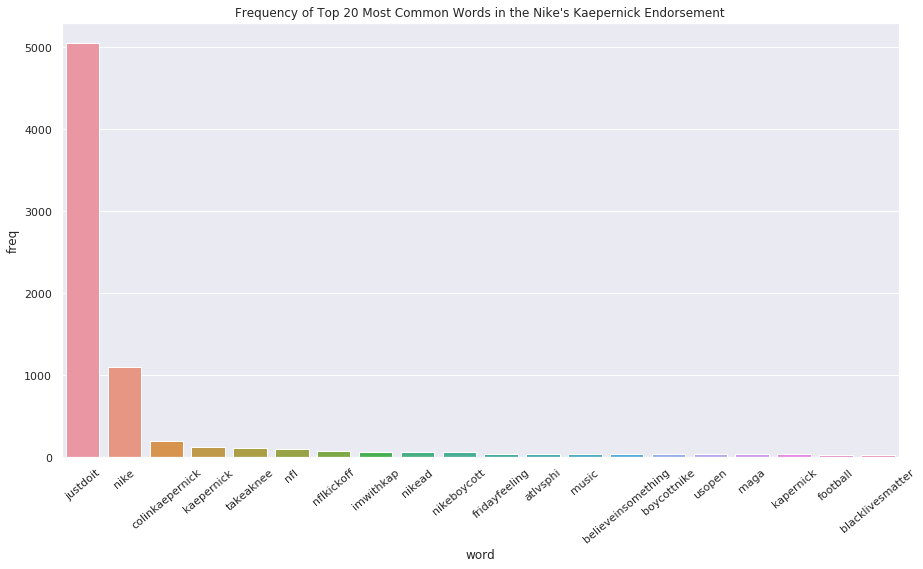

In [162]:
fig = plt.figure(figsize=(15,8))
ax = sns.barplot(x='word', y='freq', data=hashtag_count)
ax.set_xticklabels(labels=hashtag_count.word,rotation=40)
plt.title("Frequency of Top 20 Most Common Words in the Nike's Kaepernick Endorsement")
plt.show()

In [ ]:
# number of hashtags (work in progress)
hashtags = list(map(lambda txt: count_occurences("#", txt),
                    self.processed_data["splitted_text"]))